<a href="https://colab.research.google.com/github/sagsshakya/Deep-Learning/blob/master/Tweet%20Emotion%20Recognition/Copy_of_Tweet_Emotion_Recognition_Learner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [ ]:
!pip install nlp

In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.4.1


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [ ]:
df = nlp.load_dataset('emotion')

Using custom data configuration default


In [ ]:
df

{'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [ ]:
train = df['train']
test = df['test']
validation = df['validation']

In [ ]:
data = {'tweets':train['text'], 'labels' : train['label']}
import pandas as pd

df_train = pd.DataFrame(data)
df_train.sample(5)

,tweets,labels
14795,im feeling very determined,joy
11656,i feel myself afraid of being abandoned,fear
4389,i instead feel restless,fear
4223,i cant wait till the summer when we feel somew...,joy
6531,i feel the weight of my single dom pulling me ...,anger


In [ ]:
df_train['labels'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

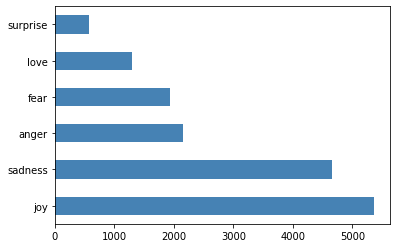

In [ ]:
df_train.labels.value_counts().plot(kind = 'barh', color = 'steelblue')

## Task 4: Tokenizer

1. Tokenizing the tweets

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 10000, oov_token = '<UNK>') 
tokenizer.fit_on_texts(df_train['tweets'])


In [ ]:
tokenizer.texts_to_sequences(df_train['tweets'].iloc[:3])

[[2, 139, 3, 679],
 [2,
  40,
  101,
  60,
  8,
  15,
  494,
  5,
  15,
  3496,
  553,
  32,
  60,
  61,
  128,
  148,
  76,
  1480,
  4,
  22,
  1255],
 [17, 3060, 7, 1149, 5, 286, 2, 3, 495, 438]]

In [ ]:
df_train['tweets'].iloc[:3]

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
Name: tweets, dtype: object

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

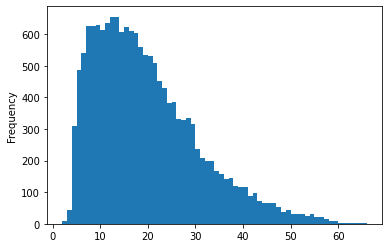

In [ ]:
df_train['lengths'] = df_train['tweets'].str.split().str.len()
df_train['lengths'].plot(kind = 'hist', bins = df_train['lengths'].nunique())

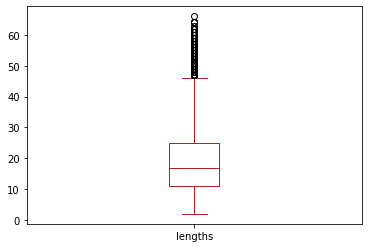

In [ ]:
df_train.lengths.plot(kind = 'box', color = 'firebrick')

In [ ]:
maxlen = 50
from keras.preprocessing.sequence import pad_sequences

def get_sequences(tweets, tokenizer = tokenizer):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded = pad_sequences(sequences, maxlen=maxlen, truncating='post', padding = 'post')
    return padded

In [ ]:
padded_train_seq = get_sequences(df_train.tweets)
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [ ]:
classes = df_train['labels'].unique()
classes

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

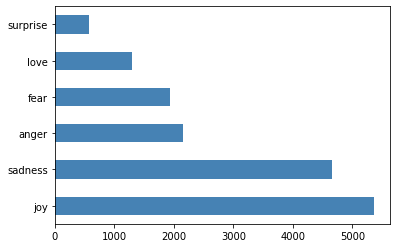

In [ ]:
df_train.labels.value_counts().plot(kind = 'barh', color = 'steelblue')

In [ ]:
class_to_index = dict((CLASS, idx) for idx, CLASS in enumerate(classes))
index_to_class = dict((value, key) for key, value in class_to_index.items())

print(class_to_index)
print(index_to_class)

{'sadness': 0, 'anger': 1, 'love': 2, 'surprise': 3, 'fear': 4, 'joy': 5}
{0: 'sadness', 1: 'anger', 2: 'love', 3: 'surprise', 4: 'fear', 5: 'joy'}


In [ ]:
# Creating a Label Encoder for the labels.
df_train['target'] = df_train['labels'].map(class_to_index)
df_train.sample(3)

,tweets,labels,lengths,target
8123,i dont think that is true and i have tried to ...,sadness,32,0
4599,i am feeling terribly mellow today sitting in ...,joy,30,5
11854,i know many of my readers are also non make up...,love,29,2


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense

model = Sequential()
model.add(Embedding(10000, 16, input_length=maxlen))
model.add(Bidirectional(LSTM(20, return_sequences=True)))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(len(classes), activation = 'softmax'))

In [ ]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(lr = 0.05, decay = 0.01), 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 16)            160000    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 50, 40)            5920      
_________________________________________________________________
bidirectional_5 (Bidirection (None, 40)                9760      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 246       
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [ ]:
validation_data = {'tweets':validation['text'], 'labels' : validation['label']}
df_validation = pd.DataFrame(validation_data)

test_data = {'tweets':test['text'], 'labels' : test['label']}
df_test = pd.DataFrame(test_data)

In [ ]:
validation_seq = get_sequences(tweets = df_validation['tweets'])
df_validation['target'] = df_validation['labels'].map(class_to_index)
df_validation.sample(5)

,tweets,labels,target
1674,i feel like you think im heartless and honestl...,anger,1
1615,ive already noticed that ive lost weight i fee...,joy,5
1035,i feel like im supporting a community that i l...,love,2
1127,i had the feeling that i missed something as c...,sadness,0
174,when going to the exam,fear,4


In [ ]:
test_seq = get_sequences(tweets = df_test['tweets'])
df_test['target'] = df_test['labels'].map(class_to_index)
df_test.sample(5)

,tweets,labels,target
1368,im feeling rotten and pretending it just aint so,sadness,0
1186,i don t know about you but sometimes i feel th...,sadness,0
65,i feel a little stunned but can t imagine what...,surprise,3
1879,i feel ashamed and so i tried my very best to ...,sadness,0
1939,i don t know what to feel as in i am not sure ...,joy,5


In [ ]:
# Fitting the model.
from keras.callbacks import EarlyStopping
hist = model.fit(x = padded_train_seq, y = df_train['target'],
          validation_data = (validation_seq, df_validation['target']),
          epochs = 30, 
          callbacks = [EarlyStopping(monitor = 'val_accuracy', patience = 5)]
          )

Epoch 1/30
500/500 [==============================] - 7s 15ms/step - loss: 0.0056 - accuracy: 0.9969 - val_loss: 0.4420 - val_accuracy: 0.9145
Epoch 2/30
500/500 [==============================] - 7s 15ms/step - loss: 0.0055 - accuracy: 0.9968 - val_loss: 0.4476 - val_accuracy: 0.9135
Epoch 3/30
500/500 [==============================] - 7s 15ms/step - loss: 0.0052 - accuracy: 0.9971 - val_loss: 0.4420 - val_accuracy: 0.9135
Epoch 4/30
500/500 [==============================] - 7s 15ms/step - loss: 0.0050 - accuracy: 0.9973 - val_loss: 0.4440 - val_accuracy: 0.9170
Epoch 5/30
500/500 [==============================] - 7s 15ms/step - loss: 0.0047 - accuracy: 0.9974 - val_loss: 0.4546 - val_accuracy: 0.9130
Epoch 6/30
500/500 [==============================] - 7s 15ms/step - loss: 0.0048 - accuracy: 0.9971 - val_loss: 0.4561 - val_accuracy: 0.9140
Epoch 7/30
500/500 [==============================] - 7s 15ms/step - loss: 0.0046 - accuracy: 0.9974 - val_loss: 0.4599 - val_accuracy: 0.9140

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

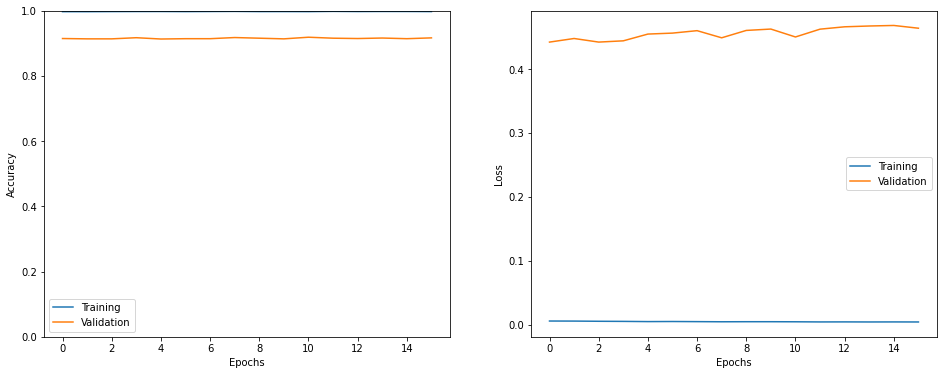

In [ ]:
show_history(hist)

In [ ]:
model.evaluate(test_seq, df_test['target'])

63/63 [==============================] - 0s 6ms/step - loss: 0.5299 - accuracy: 0.9120


[0.5298796892166138, 0.9120000004768372]

In [ ]:
test_predictions = model.predict(test_seq, )
test_predictions_indices = np.argmax(test_predictions, axis = 1)

In [ ]:
df_test['predictions'] = pd.Series(test_predictions_indices).map(index_to_class)

In [ ]:
df_test.loc[150, :]

tweets         im feeling rather angsty and listless
labels                                       sadness
target                                             0
predictions                                  sadness
Name: 150, dtype: object

In [ ]:
pred = model.predict_classes(test_seq)
np.unique(pred)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 1, 2, 3, 4, 5])

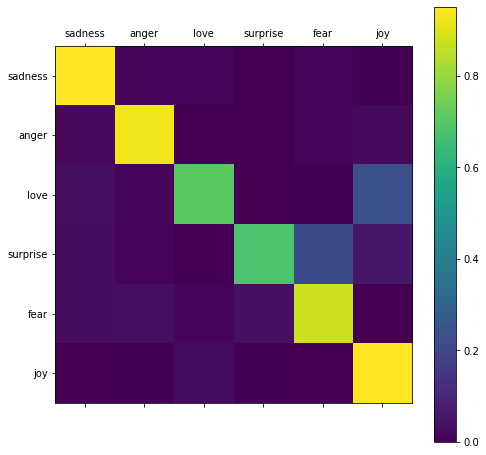

In [ ]:
show_confusion_matrix(df_test.target.values.ravel(), pred, classes)